In [38]:
#import modules
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt
import numpy as np
import os

In [39]:
data = pd.read_csv("customer_purchases.csv")

In [40]:
os.getcwd()

'C:\\Users\\user'

In [41]:
os.chdir("C:\Users\user\Downloads\cltv (1)\customer_purchases.csv")

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (3570084084.py, line 1)

In [42]:
data = pd.read_csv("customer_purchases.csv")

In [43]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [44]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [45]:
filtered_data=data[['Country','CustomerID']].drop_duplicates()

<AxesSubplot:>

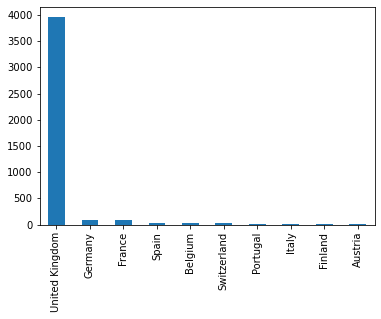

In [46]:
#Top ten country's customer
filtered_data.Country.value_counts()[:10].plot(kind='bar')

In [47]:
<matplotlib.axes._subplots.AxesSubplot at 0x7fe677a887f0>

SyntaxError: invalid syntax (4087153297.py, line 1)

In [18]:
uk_data=data[data.Country=='United Kingdom']
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495478 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    495478 non-null  object 
 1   StockCode    495478 non-null  object 
 2   Description  494024 non-null  object 
 3   Quantity     495478 non-null  int64  
 4   InvoiceDate  495478 non-null  object 
 5   UnitPrice    495478 non-null  float64
 6   CustomerID   361878 non-null  float64
 7   Country      495478 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 34.0+ MB


In [19]:
uk_data.describe()

,Quantity,UnitPrice,CustomerID
count,495478.000000,495478.000000,361878.000000
mean,8.605486,4.532422,15547.871368
std,227.588756,99.315438,1594.402590
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,14194.000000
50%,3.000000,2.100000,15514.000000
75%,10.000000,4.130000,16931.000000
max,80995.000000,38970.000000,18287.000000


In [20]:
uk_data = uk_data[(uk_data['Quantity']>0)]
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 486286 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    486286 non-null  object 
 1   StockCode    486286 non-null  object 
 2   Description  485694 non-null  object 
 3   Quantity     486286 non-null  int64  
 4   InvoiceDate  486286 non-null  object 
 5   UnitPrice    486286 non-null  float64
 6   CustomerID   354345 non-null  float64
 7   Country      486286 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.4+ MB


In [28]:
uk_data=uk_data[['CustomerID','InvoiceDate','InvoiceNo','Quantity','UnitPrice']]

In [29]:
#Calulate total purchase
uk_data['TotalPurchase'] = uk_data['Quantity'] * uk_data['UnitPrice']

In [57]:

uk_data_group=uk_data.groupby('CustomerID').agg({'InvoiceDate': lambda date: (date.max() - date.min()).days,
                                        'InvoiceNo': lambda num: len(num),
                                        'Quantity': lambda quant: quant.sum(),
                                        'TotalPurchase': lambda price: price.sum()})

C:\Users\user\AppData\Local\Temp\ipykernel_12412\834556998.py:1: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the function.
  uk_data_group=uk_data.groupby('CustomerID').agg({'InvoiceDate': lambda date: (date.max() - date.min()).days,


TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [31]:
uk_data_group.head()

NameError: name 'uk_data_group' is not defined

In [48]:
# Change the name of columns
uk_data_group.columns=['num_days','num_transactions','num_units','spent_money']
uk_data_group.head()

NameError: name 'uk_data_group' is not defined

In [54]:
CLTV = ((Average Order Value x Purchase Frequency)/Churn Rate) x Profit margin.

 Customer Value = Average Order Value * Purchase Frequency

SyntaxError: invalid syntax (2265556586.py, line 1)

In [ ]:
#Prediction Model for CLTV

In [32]:
uk_data.head()

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,TotalPurchase
0,17850.0,12/1/2010 8:26,536365,6,2.55,15.30
1,17850.0,12/1/2010 8:26,536365,6,3.39,20.34
2,17850.0,12/1/2010 8:26,536365,8,2.75,22.00
3,17850.0,12/1/2010 8:26,536365,6,3.39,20.34
4,17850.0,12/1/2010 8:26,536365,6,3.39,20.34


In [59]:
uk_data['month_yr'] = uk_data['InvoiceDate'].apply(lambda x: x.strftime('%b-%Y'))

AttributeError: 'str' object has no attribute 'strftime'

In [34]:
uk_data.head()

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,TotalPurchase
0,17850.0,12/1/2010 8:26,536365,6,2.55,15.30
1,17850.0,12/1/2010 8:26,536365,6,3.39,20.34
2,17850.0,12/1/2010 8:26,536365,8,2.75,22.00
3,17850.0,12/1/2010 8:26,536365,6,3.39,20.34
4,17850.0,12/1/2010 8:26,536365,6,3.39,20.34


In [37]:
sale=uk_data.pivot_table(index=['CustomerID'],columns=['month_yr'],values='TotalPurchase',aggfunc='sum',fill_value=0).reset_index()

KeyError: 'month_yr'

In [36]:
sale.head()

NameError: name 'sale' is not defined

In [60]:
sale['CLV']=sale.iloc[:,2:].sum(axis=1)


NameError: name 'sale' is not defined

In [61]:
sale.head()


NameError: name 'sale' is not defined